# Health Information National Trends Survey [HINTS] Cycle 3 (2019)

Note: the data - "HINTS 5, Cycle 3 (2019) dataset, updated March 2020" (STATA data) - can be accessed online at: https://hints.cancer.gov/data/download-data.aspx

About the Health Information National Trends Survey (HINTS):
-	a nationally representative survey conducted every few years by the National Cancer Institute since 2003
-	target population is all adults aged 18 or older in the civilian non-institutionalized population of the United States (U.S.)
-	collects cancer-related data on the American public's need for, access to, and use of health-related information and health-related behaviors, perceptions, and knowledge

HINTS 5 Cycle 3:
-	conducted from January 2019 to April 2019
-	data collected through self-administered mailed questionnaire and web-based questionnaire
-	two strata of samples: i) addresses in areas with high concentrations of minority populations; and ii) addresses in areas with low concentrations of minority populations

### Planned project: To develop a model to predict cancer among the 18 years and above adults in the U.S. using the HINTS-5 Cycle-3 data

### Step 1: Import libraries and dataset

In [1]:
#import pandas as pd
#import numpy as np

import pandas as pd
import numpy as np

In [2]:
#upload the available .dta (stata)
#data files are avilable only in SAS, STATA and SPSS versions

location = 'hints5_cycle3_public.dta'

df = pd.read_stata(location)
df.head(3)

,hhid,personid,stratum,app_region,highspanli,hispsurname,hisp_hh,ruc2003,ruc2013,pr_ruca_2010,...,hhinc,bmi,agedx,timesincedx,smokestat,phq4,weeklyminutesmoderateexercise,eciguse,avgdrinksperweek,incomeranges_imp
0,91000002.0,91000002-02,HM,,No,No,No,"Nonmetro county with urban population of 2,500...","Nonmetro - Urban population of 2,500 to 19,999...",Small town core: primary flow within an Urban ...,...,"Less than $20,000",26.3,"Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer",Never,5,0,Never,0,"$15,000 to $19,999"
1,91000006.0,91000006-02,HM,,No,No,No,"Nonmetro county with urban population of 2,500...","Nonmetro - Urban population of 2,500 to 19,999...",Metropolitan area high commuting: primary flow...,...,"$50,000 to < $75,000",28.3,"Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer",Never,0,30,Never,Missing Data (Not Ascertained),"$50,000 to $74,999"
2,91000007.0,91000007-03,HM,,No,No,No,"Nonmetro county with urban population of 2,500...","Nonmetro - Urban population of 2,500 to 19,999...",Small town high commuting: primary flow 30% or...,...,Missing Data (Not Ascertained),37.1,Missing Data (Filter Missing),"Missing Data (Filter Missing), coded -9 in Eve...",Former,6,0,Never,0,"$35,000 to $49,999"


In [3]:
#check the number of rows and columns
df.shape

(5438, 731)

### Step 2: Create the dataset with only necessary variables for the analysis

In [4]:
#extract the list of columns
list(df.columns)

['hhid',
 'personid',
 'stratum',
 'app_region',
 'highspanli',
 'hispsurname',
 'hisp_hh',
 'ruc2003',
 'ruc2013',
 'pr_ruca_2010',
 'sec_ruca_2010',
 'sec_ruca_2010_descript',
 'dra',
 'treatment_h5c3',
 'nchsurcode2013',
 'censdiv',
 'censreg',
 'var_stratum',
 'var_cluster',
 'formtype',
 'language_flag',
 'qdisp',
 'updatedate',
 'adultsinhh',
 'mailhhadults',
 'seekhealthinfo',
 'whereseekhealthinfo',
 'wholookingfor',
 'lotofeffort',
 'frustrated',
 'confidentgethealthinf',
 'trustdoctor',
 'trustfamily',
 'trustgov',
 'trustcharities',
 'trustreligiousorgs',
 'strongneedhealthinfo',
 'strongneedhealthinfo_os',
 'seekcancerinfo',
 'useinternet',
 'internet_dialup',
 'internet_broadbnd',
 'internet_cell',
 'internet_wifi',
 'internetcancerinfoself',
 'whereuseinternet_home',
 'whereuseinternet_work',
 'whereuseinternet_publicplace',
 'whereuseinternet_mobiledevice',
 'electronic_selfhealthinfo',
 'electronic_buymedicine',
 'electronic_talkdoctor',
 'electronic_trackedhealthcosts'


#### Selecting list of potential variables for the analysis

'personid',

'everhadcancer',
'cancer_cat',
'agedx','timesincedx'

##### demographics and physical measures
'age',
'bmi',
'genderc',
'maritalstatus',
'raceethn5',
'educa',

'familyeverhadcancer',

##### health-seeking behavior
'smokestat',
'weeklyminutesmoderateexercise',
'avgdrinksperweek',

**cancer screening**
'everhadpsatest',
'evertestedcolonca',
'whenpaptest',
'whenmammogram'

#### For an initial exploration, create a dataframe with cancer-related variables ('everhadcancer', 'cancer_cat', 'agedx', 'timesincedx'), demographics and physical measures and 'familyeverhadcancer'.

In [5]:
#creating dataframe 'df1' with the selected list of variables from 'df'
df1 = df[[
    'personid',
    'everhadcancer',
    'cancer_cat',
    'agedx',
    'timesincedx',
    'age',
    'bmi',
    'genderc',
    'maritalstatus',
    'raceethn5',
    'hhinc',
    'educa',
    'familyeverhadcancer'
    ]]

In [6]:
#checking the number of rows and columns in df1
df1.shape

(5438, 13)

#### 2.1 Sort out the continuous and categorical variables

In [7]:
#get the summary statistics of the continuous variables
df1.describe()

,personid,everhadcancer,cancer_cat,agedx,timesincedx,age,bmi,genderc,maritalstatus,raceethn5,hhinc,educa,familyeverhadcancer
count,5438,5438,5438,5438,5438,5438,5438,5438,5438,5438,5438,5438,5438
unique,5438,4,28,85,9,82,364,4,9,7,7,6,6
top,93022696-01,No,"Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer",Missing data (Not Ascertained),Missing Data (Not Ascertained),Female,Married,Non-Hispanic White,"$75,000 or More",College Graduate or More,Yes
freq,1,4470,4459,4449,4449,151,156,3073,2588,3054,1802,2410,3758


In [8]:
#checking the types of data in df1
df1.dtypes

personid                 object
everhadcancer          category
cancer_cat             category
agedx                  category
timesincedx            category
age                    category
bmi                    category
genderc                category
maritalstatus          category
raceethn5              category
hhinc                  category
educa                  category
familyeverhadcancer    category
dtype: object

##### Variables in df1 with discrepancies in dtypes  
'age','bmi'

In [9]:
#check the unique values in 'age'
df1['age'].unique()

[71, 47, Missing data (Not Ascertained), 65, 45, ..., 18, Unreadable or Non-conforming numeric response, 98, 94, 95]
Length: 82
Categories (82, object): [Missing data (Not Ascertained) < Unreadable or Non-conforming numeric response < 18 < 19 ... 94 < 95 < 97 < 98]

#### 2.2 Clean missing and invalid values in 'age'

In [10]:
#replace missing and invalid values with null values - ‘NaN’
df1['age'].replace({
    'Missing data (Not Ascertained)': np.nan, 
    'Unreadable or Non-conforming numeric response': np.nan}, 
    inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
#check the unique values in 'age'
df1['age'].unique()

array([71., 47., nan, 65., 45., 70., 53., 80., 23., 89., 68., 93., 63.,
       55., 61., 75., 60., 44., 72., 50., 37., 62., 91., 73., 48., 69.,
       28., 24., 86., 52., 78., 57., 39., 38., 30., 33., 43., 29., 67.,
       34., 42., 81., 74., 87., 84., 54., 76., 51., 58., 59., 64., 27.,
       77., 25., 41., 82., 56., 32., 83., 85., 35., 90., 26., 19., 36.,
       22., 92., 40., 66., 31., 49., 88., 79., 46., 21., 20., 97., 18.,
       98., 94., 95.])

In [12]:
#confirm null values in 'age'
df1['age'].isnull().sum()

154

In [13]:
#change the data-type for 'age' to 'float'
df1['age'] = df1['age'].astype('float')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
#replace null values by mean age
df1['age'].fillna(df1['age'].mean(), inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [15]:
#check if the null values are replaced
df1['age'].isnull().sum()

0

In [16]:
df1['age'].describe()

count    5438.000000
mean       56.930167
std        16.653824
min        18.000000
25%        45.000000
50%        58.000000
75%        69.000000
max        98.000000
Name: age, dtype: float64

#### 2.3 Repeat the same steps to clean missing variables in 'bmi'

In [17]:
df1['bmi'].unique()

[26.3, 28.3, 37.1, 21.6, 28.8, ..., 48.5, 50.5, 17.6, 46.8, 54.2]
Length: 364
Categories (364, object): [Missing Data (Not Ascertained) < Missing data (Web partial - Question Never Seen) < Unreadable or Nonconforming Numeric Response < 9.4 ... 61.8 < 62.9 < 65.1 < 67.5]

In [18]:
df1['bmi'].replace({
    'Missing Data (Not Ascertained)': np.nan,
    'Unreadable or Nonconforming Numeric Response': np.nan,
    'Missing data (Web partial - Question Never Seen)': np.nan}, 
    inplace=True)

In [19]:
df1['bmi'].unique()

array([26.3, 28.3, 37.1, 21.6, 28.8, 40.3, 26.6, 30.2,  nan, 38.6, 25.7,
       26.1, 34.7, 34.3, 28.9, 31.1, 31. , 24.5, 33.3, 29. , 34.1, 20.8,
       25.2, 24.7, 28.2, 30.4, 25.1, 27.4, 38.1, 29.1, 25. , 22.1, 31.8,
       23.6, 35.8, 28. , 24.3, 38. , 26.8, 17.5, 29.7, 36.3, 27.1, 23.5,
       44.3, 20.5, 23.9, 27.6, 27.9, 26.5, 25.8, 32.9, 31.2, 32.4, 31.6,
       27.5, 21.3, 27. , 46.3, 20. , 21.1, 33.9, 36.4, 44. , 30. , 33.4,
       19.8, 42.6, 23.8, 48. , 19.2, 21.2, 39.2, 29.6, 24.9, 41.4, 50.3,
       24.8, 32.3, 21.9, 35.2, 27.8, 31.9, 20.1, 22.6, 33.6, 45.9, 31.3,
       23.3, 22.7, 10.6, 22.8, 30.8, 28.1, 31.7, 33.7, 24.2, 59.9, 32.8,
       34.5, 43. , 43.9, 23. , 24.1, 33.2, 26.9, 38.5, 30.9, 27.3, 22.5,
       19.4, 25.6, 27.2, 23.7, 23.2, 39.8, 18.8, 20.4, 27.7, 35.7, 17.8,
       29.3, 24. , 19.6, 34.8, 30.1, 23.1, 20.9, 22.3, 43.7, 19.3, 24.4,
       36.5, 22. , 14.9, 19.7, 29.2, 37.7, 35.9, 45.6, 36.9, 35.5, 42.1,
       26.4, 40.2, 30.5, 21. , 18.6, 36. , 44.8, 35

In [20]:
df1['bmi'] = df1['bmi'].astype('float')

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df1['bmi'].isnull().sum()

182

In [22]:
df1['bmi'].fillna(df1['bmi'].mean(), inplace=True)

In [23]:
df1['bmi'].isnull().sum()

0

In [24]:
df1['bmi'].describe()

count    5438.000000
mean       28.477778
std         6.382929
min         9.400000
25%        24.100000
50%        27.400000
75%        31.500000
max        67.500000
Name: bmi, dtype: float64

#### 2.4 Check and clean the target variable - 'everhadcancer'

In [25]:
#check and count values for 'everhadcancer'
#it is also the target variable for 'analysis 1'
df1['everhadcancer'].value_counts()

No                                                  4470
Yes                                                  856
Missing data (Not Ascertained)                        72
Missing data (Web partial - Question Never Seen)      40
Name: everhadcancer, dtype: int64

##### Drop missing values

In [26]:
df1a = df1.drop(df1[(df1.everhadcancer == 'Missing data (Not Ascertained)')].index)

In [27]:
df1b = df1a.drop(df1a[(df1a.everhadcancer == 'Missing data (Web partial - Question Never Seen)')].index)

In [28]:
#check and count values in new dataset 'df1b'
df1b['everhadcancer'].value_counts()

No                                                  4470
Yes                                                  856
Missing data (Web partial - Question Never Seen)       0
Missing data (Not Ascertained)                         0
Name: everhadcancer, dtype: int64

In [29]:
total_valid_observations = 4470 + 856
total_valid_observations

5326

#### 2.5 Identify and clean outliers in 'age' and 'bmi'

##### Import libraries for data visualization and analysis

In [30]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [31]:
#create dataset 'vis_df1b' with 'everhadcancer','age', and 'bmi'
vis_df1b = df1b[['everhadcancer','age','bmi']]
vis_df1b.head(2)

,everhadcancer,age,bmi
0,No,71.0,26.3
1,No,47.0,28.3


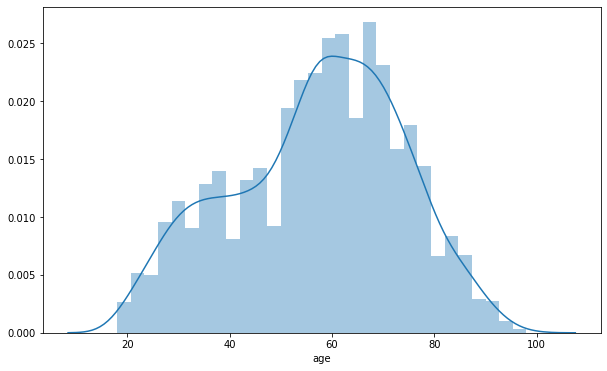

In [32]:
#assign size of plot
plt.subplots(figsize=(10,6))

#create a histogram of the distribution of age
sns.distplot(df1b['age'])

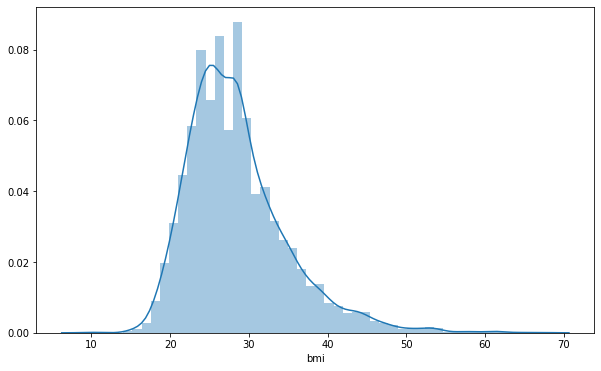

In [33]:
#assign size of plot
plt.subplots(figsize=(10,6))

#create a histogram of the distribution of bmi
sns.distplot(df1b['bmi'])

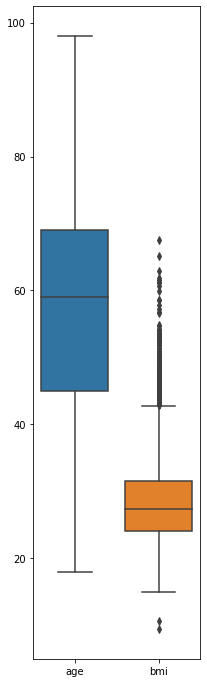

In [34]:
#assign size of plot
plt.subplots(figsize=(3,12))

#boxplot showing stats for age and bmi
sns.boxplot(data=vis_df1b)

###### Observation: the boxplot shows that the median for 'age' is near 60, while for 'bmi' it is near 30. The 'bmi' also has outliers - two below the first interquartile value and several above the thrid inter-quartile value.

In [35]:
#generate a dataset for bmi
bmi_df1b = df1b[['bmi']]
bmi_df1b.head(2)

,bmi
0,26.3
1,28.3


##### Remove outliers in 'bmi'

In [36]:
#Using Interquartile Range (IQR) Method to locate and remove outliers in bmi

q1 = vis_df1b['bmi'].quantile(.25)
q3 = vis_df1b['bmi'].quantile(.75)
iqr = q3-q1

toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5

In [37]:
toprange

42.85

In [38]:
botrange

12.850000000000001

In [39]:
#get a bool series representing rows satisfying the condition i.e. True for 'bmi' < 30
bmi_br = bmi_df1b.apply(lambda x: True if x['bmi'] < 12.85 else False , axis=1)
 
#count number of True in the series
NumOfRows = len(bmi_br[bmi_br == True].index)
 
print(NumOfRows)

2


In [40]:
#get a bool series representing rows satisfying the condition i.e. True for 'bmi' > 42.85
bmi_tr = bmi_df1b.apply(lambda y: True if y['bmi'] > 42.85 else False , axis=1)
 
#count number of True in the series
NumOfRows01 = len(bmi_tr[bmi_tr == True].index)
 
print(NumOfRows01)

193


In [41]:
outliers_bmi_count = NumOfRows + NumOfRows01
outliers_bmi_count

195

In [42]:
new_vis_df1b = vis_df1b.copy()
new_vis_df1b = new_vis_df1b.drop(new_vis_df1b[new_vis_df1b['bmi'] > toprange].index)
new_vis_df1b = new_vis_df1b.drop(new_vis_df1b[new_vis_df1b['bmi'] < botrange].index)

new_vis_df1b.head(2)

,everhadcancer,age,bmi
0,No,71.0,26.3
1,No,47.0,28.3


In [43]:
new_vis_df1b.shape

(5131, 3)

[Text(0.5, 0, 'BMI')]

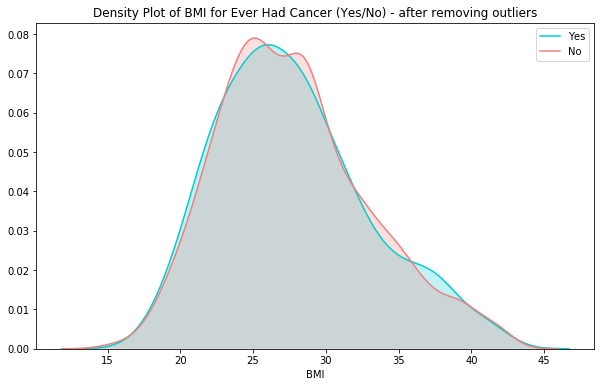

In [44]:
#plot bmi by cancer status after removing outliers
plt.figure(figsize=(10,6))

ax = sns.kdeplot(new_vis_df1b['bmi'][new_vis_df1b['everhadcancer'] == 'Yes'],
                 color="darkturquoise",
                 shade=True)

sns.kdeplot(new_vis_df1b['bmi'][new_vis_df1b['everhadcancer'] == 'No'],
            color="lightcoral",
            shade=True)

plt.legend (['Yes', 'No'])
plt.title("Density Plot of BMI for Ever Had Cancer (Yes/No) - after removing outliers")

ax.set(xlabel='BMI')

##### Observation: the bmi does not seem to have any effect on cancer status, since the areas of the map covered by those having cancer and not  having cancer seem to overlap each other completely.

[Text(0.5, 0, 'Age')]

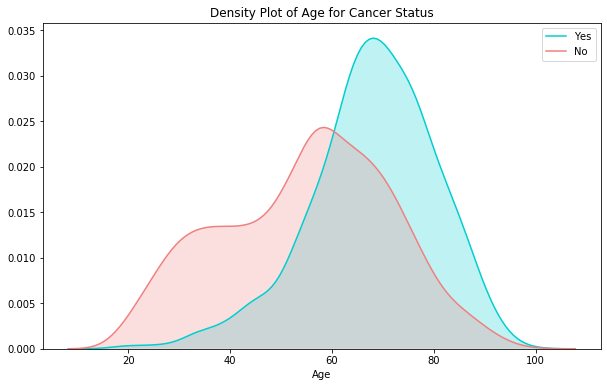

In [45]:
#plot age by cancer status
plt.figure(figsize=(10,6))

ax = sns.kdeplot(vis_df1b['age'][vis_df1b['everhadcancer'] == 'Yes'],
                 color="darkturquoise",
                 shade=True)

sns.kdeplot(vis_df1b['age'][vis_df1b['everhadcancer'] == 'No'],
            color="lightcoral",
            shade=True)

plt.legend (['Yes', 'No'])
plt.title("Density Plot of Age for Cancer Status")

ax.set(xlabel='Age')

##### Observation: age seems to have influence on the cancer status. More adults who have cancer seem to be of higher age than those not having cancer.

### 3. Explore and analyze categorical variables

In [46]:
#retrieve the list of columns to work on categorical variables
df1b.columns

Index(['personid', 'everhadcancer', 'cancer_cat', 'agedx', 'timesincedx',
       'age', 'bmi', 'genderc', 'maritalstatus', 'raceethn5', 'hhinc', 'educa',
       'familyeverhadcancer'],
      dtype='object')

#### [a] Types of cancer ['cancer_cat']

In [47]:
#check and count values in 'cancer_cat'
df1b['cancer_cat'].value_counts()

Inapplicable, coded 2 in EverHadCancer              4459
Skin cancer only                                     200
More than one cancer checked                         161
Breast cancer only                                   116
Prostate cancer only                                  82
Melanoma only                                         41
Other cancer only                                     37
Cervical cancer only                                  37
Colon cancer only                                     31
Endometrial cancer only                               19
Renal cancer only                                     19
Lung cancer only                                      18
Non-Hodgkins only                                     17
Bladder cancer only                                   17
Leukemia only                                         14
Ovarian cancer only                                   12
Question answered in error (Commission Error)         11
Missing data (Not Ascertained) 

In [48]:
#verifying total type of cancers with the total cancer cases from 'everhadcancer' column
df1b['everhadcancer'].value_counts()

No                                                  4470
Yes                                                  856
Missing data (Web partial - Question Never Seen)       0
Missing data (Not Ascertained)                         0
Name: everhadcancer, dtype: int64

In [49]:
#total cancer cases (from 'everhadcancer') = 856
#total cancer cases (from 'cancer_cat'):
tot_canc_cat = 5326 - (4459 + 11)
tot_canc_cat

856

In [50]:
#creating a dataset for everhadcancer and cancer_cat
cd_cc = df1b[['everhadcancer','cancer_cat']]
cd_cc.head(2)

,everhadcancer,cancer_cat
0,No,"Inapplicable, coded 2 in EverHadCancer"
1,No,"Inapplicable, coded 2 in EverHadCancer"


In [51]:
cd_cc['cancer_cat'].value_counts()

Inapplicable, coded 2 in EverHadCancer              4459
Skin cancer only                                     200
More than one cancer checked                         161
Breast cancer only                                   116
Prostate cancer only                                  82
Melanoma only                                         41
Other cancer only                                     37
Cervical cancer only                                  37
Colon cancer only                                     31
Endometrial cancer only                               19
Renal cancer only                                     19
Lung cancer only                                      18
Non-Hodgkins only                                     17
Bladder cancer only                                   17
Leukemia only                                         14
Ovarian cancer only                                   12
Question answered in error (Commission Error)         11
Missing data (Not Ascertained) 

In [52]:
#changing the column name for readability
cd_cc.rename(columns={
    'everhadcancer':'Cancer Status',
    'cancer_cat':'Cancer Category'},
             inplace = True)

cd_cc.head(2)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Cancer Status,Cancer Category
0,No,"Inapplicable, coded 2 in EverHadCancer"
1,No,"Inapplicable, coded 2 in EverHadCancer"


In [53]:
#dropping missing and invalid values in Cancer Category
#first replace these values with null values (nan)
cd_cc['Cancer Category'].replace({
    'Inapplicable, coded 2 in EverHadCancer': np.nan,
    'Question answered in error (Commission Error)': np.nan,
    'Missing data (Not Ascertained)': np.nan}, 
    inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [54]:
cd_cc.dropna

<bound method DataFrame.dropna of      Cancer Status       Cancer Category
0               No                   NaN
1               No                   NaN
3               No                   NaN
4               No                   NaN
5              Yes  Cervical cancer only
...            ...                   ...
5433            No                   NaN
5434            No                   NaN
5435            No                   NaN
5436            No                   NaN
5437            No                   NaN

[5326 rows x 2 columns]>

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text xticklabel objects>)

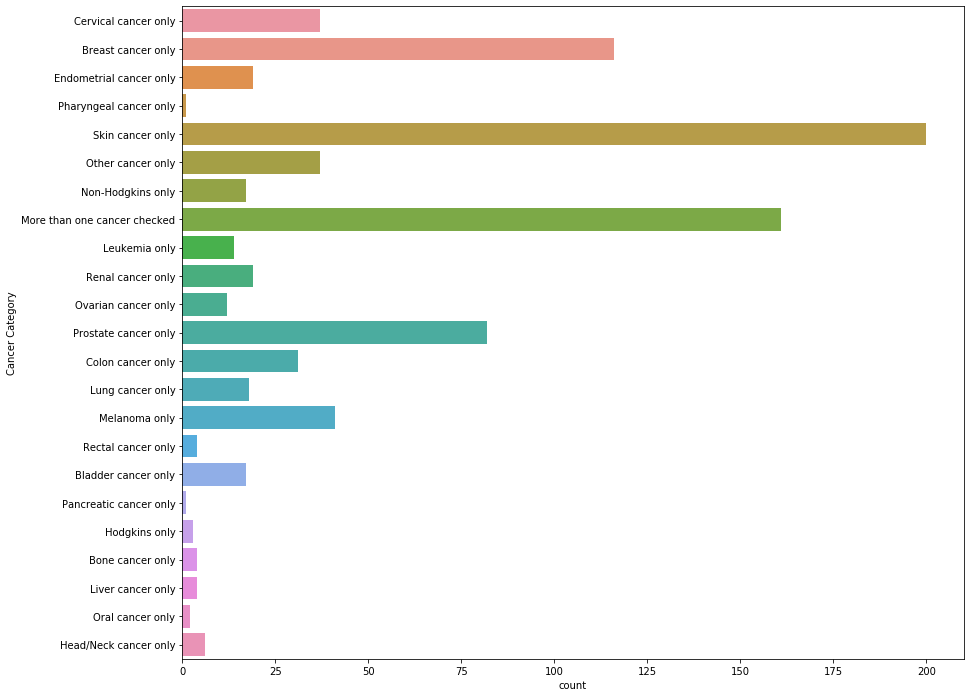

In [55]:
#assign size of plot
plt.subplots(figsize=(14,12))

#create a bar plot of Cancer Category frequency
sns.countplot(y='Cancer Category',
              data=cd_cc)

plt.xticks(rotation=0)

#### Work on remaining categorical variables

##### First, change the column names of df1b for readability

In [56]:
df1b.columns

Index(['personid', 'everhadcancer', 'cancer_cat', 'agedx', 'timesincedx',
       'age', 'bmi', 'genderc', 'maritalstatus', 'raceethn5', 'hhinc', 'educa',
       'familyeverhadcancer'],
      dtype='object')

In [57]:
df1b.rename(columns={
    'personid':'Person ID',
    'everhadcancer':'Cancer Status', 
    'cancer_cat':'Type of Cancer', 
    'agedx':'Age of Diagnosis', 
    'timesincedx': 'Time since Diagnosis',
    'age':'Age', 
    'bmi':'BMI', 
    'genderc':'Gender', 
    'maritalstatus':'Marital Status', 
    'raceethn5':'Race/Ethnicity', 
    'hhinc':'Household Income', 
    'educa':'Education',
    'familyeverhadcancer':'Family History of Cancer'}, 
                   inplace = True)

In [58]:
df1b.head()

,Person ID,Cancer Status,Type of Cancer,Age of Diagnosis,Time since Diagnosis,Age,BMI,Gender,Marital Status,Race/Ethnicity,Household Income,Education,Family History of Cancer
0,91000002-02,No,"Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer",71.0,26.3,Female,Married,Non-Hispanic White,"Less than $20,000",Less than High School,Not sure
1,91000006-02,No,"Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer",47.0,28.3,Female,Married,Non-Hispanic Black or African American,"$50,000 to < $75,000",Some College,Yes
3,91000008-01,No,"Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer",65.0,21.6,Female,Married,Non-Hispanic White,"$20,000 to < $35,000",College Graduate or More,Yes
4,91000012-01,No,"Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer","Inapplicable, coded 2 in EverHadCancer",45.0,28.8,Female,Living as married or living with a romantic pa...,Non-Hispanic White,"$35,000 to < $50,000",Some College,Yes
5,91000021-01,Yes,Cervical cancer only,55,11+ Yrs Since DX,70.0,40.3,Female,"Single, never been married",Missing Data (Not Ascertained),Missing Data (Not Ascertained),High School Graduate,Yes


#### 3.1 Explore and analyse data for demographical variables (Gender, Marital Status, Race/Ethnicity, Household Income, and Education)

#### [a] Gender

In [59]:
#create dataset (cd_g)of Cancer Status and Gender
cd_g = df1b[['Cancer Status','Gender']]
cd_g.head(2)

,Cancer Status,Gender
0,No,Female
1,No,Female


In [60]:
#identify the missing and invalid values
cd_g['Gender'].value_counts()

Female                                              3052
Male                                                2220
Missing data (Not Ascertained)                        54
Missing data (Web partial - Question Never Seen)       0
Name: Gender, dtype: int64

In [61]:
#replace missing and invalid values with null values -'NaN'
cd_g['Gender'].replace({'Missing data (Not Ascertained)': np.nan}, inplace=True)

In [62]:
#drop null values
cd_g.dropna

<bound method DataFrame.dropna of      Cancer Status  Gender
0               No  Female
1               No  Female
3               No  Female
4               No  Female
5              Yes  Female
...            ...     ...
5433            No    Male
5434            No  Female
5435            No    Male
5436            No    Male
5437            No    Male

[5326 rows x 2 columns]>

In [63]:
cd_g['Gender'].value_counts()

Female    3052
Male      2220
Name: Gender, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

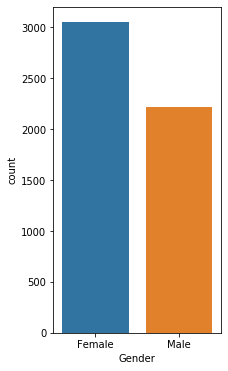

In [64]:
#assign size of plot
plt.subplots(figsize=(3,6))

#create a bar plot of Cancer Category frequency
sns.countplot(x='Gender',
              data=cd_g)

plt.xticks(rotation=0)

In [65]:
#create a two-way table for Gender and Cancer Status
gen_cs = pd.crosstab(index=cd_g['Gender'],
                    columns=cd_g['Cancer Status'])

gen_cs

Cancer Status,Yes,No
Gender,,
Female,473,2579
Male,376,1844


(array([0, 1]), <a list of 2 Text xticklabel objects>)

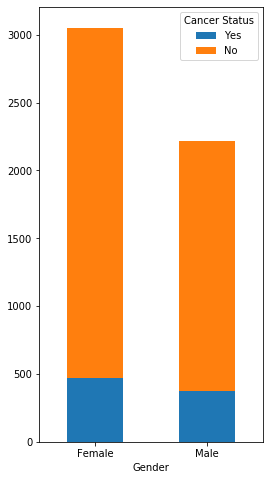

In [66]:
#create a stacked bar table for Gender by Cancer Status
gen_cs.plot(kind="bar",
           figsize=(4,8),
           stacked=True)

plt.xticks(rotation=0)

#### [b] Marital Status

In [67]:
#create a dataset of cancer status (everhadcancer) with marital status (maritalstatus)
cd_ms = df1b[['Cancer Status','Marital Status']]
cd_ms.head(2)

,Cancer Status,Marital Status
0,No,Married
1,No,Married


In [68]:
#get the value counts for cancer status
cd_ms['Cancer Status'].value_counts()

No                                                  4470
Yes                                                  856
Missing data (Web partial - Question Never Seen)       0
Missing data (Not Ascertained)                         0
Name: Cancer Status, dtype: int64

In [69]:
#get the value counts 
cd_ms['Marital Status'].value_counts()

Married                                                2587
Single, never been married                              881
Divorced                                                832
Widowed                                                 588
Living as married or living with a romantic partner     259
Separated                                               111
Missing data (Not Ascertained)                           57
Multiple responses selected in error                      8
Missing data (Web partial - Question Never Seen)          3
Name: Marital Status, dtype: int64

In [70]:
cd_ms['Marital Status'].replace({
    'Missing data (Not Ascertained)': np.nan,
    'Multiple responses selected in error': np.nan,
    'Missing data (Web partial - Question Never Seen)': np.nan}, 
    inplace=True)

In [71]:
cd_ms.dropna

<bound method DataFrame.dropna of      Cancer Status                                     Marital Status
0               No                                            Married
1               No                                            Married
3               No                                            Married
4               No  Living as married or living with a romantic pa...
5              Yes                         Single, never been married
...            ...                                                ...
5433            No                         Single, never been married
5434            No                                            Married
5435            No                                           Divorced
5436            No                         Single, never been married
5437            No                         Single, never been married

[5326 rows x 2 columns]>

In [72]:
cd_ms['Marital Status'].value_counts()

Married                                                2587
Single, never been married                              881
Divorced                                                832
Widowed                                                 588
Living as married or living with a romantic partner     259
Separated                                               111
Name: Marital Status, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text xticklabel objects>)

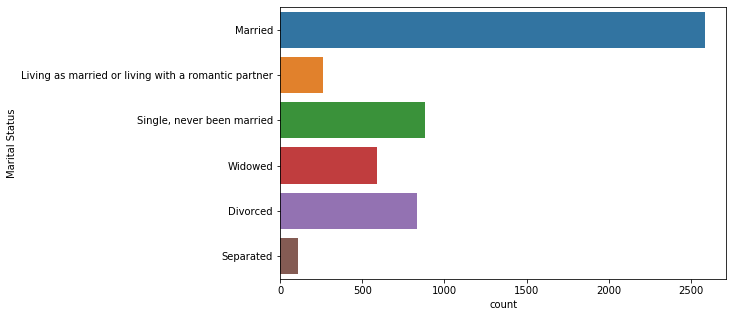

In [73]:
#assign size of plot
plt.subplots(figsize=(8,5))

#create a bar plot of Cancer Category frequency
sns.countplot(y='Marital Status',
              data=cd_ms)

plt.xticks(rotation=0)

In [74]:
#create a two-way table for Marital Status and Cancer Status
ms_cs = pd.crosstab(index=cd_ms['Marital Status'],
                    columns=cd_ms['Cancer Status'])

ms_cs

Cancer Status,Yes,No
Marital Status,,
Divorced,161,671
Living as married or living with a romantic partner,28,231
Married,398,2189
Separated,18,93
"Single, never been married",83,798
Widowed,163,425


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

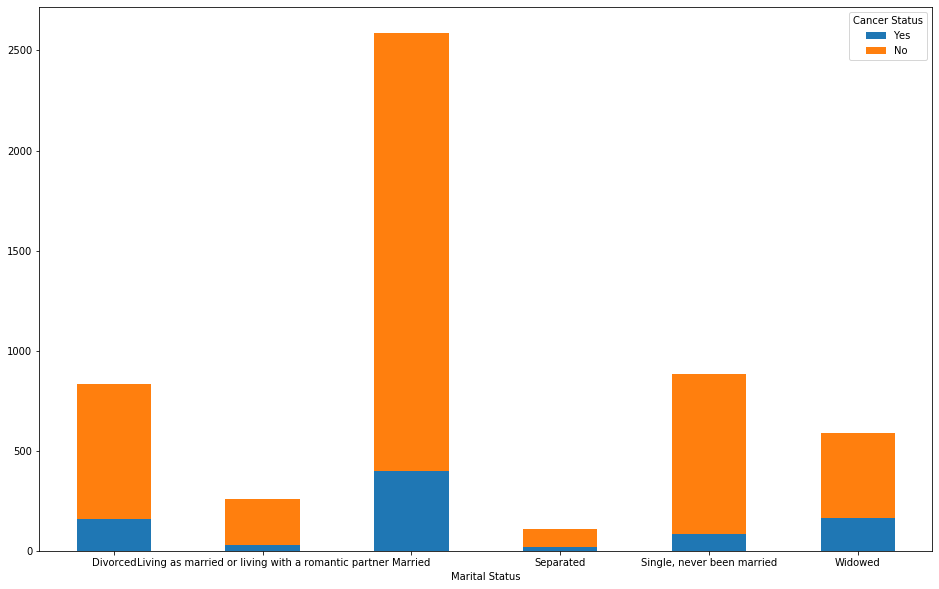

In [75]:
#plot a stacked-bar
ms_cs.plot(kind="bar",
           figsize=(16,10),
           stacked=True)

plt.xticks(rotation=0)

#### [c] Race/Ethnicity

In [76]:
cd_r = df1b[['Cancer Status','Race/Ethnicity']]
cd_r.head(2)

,Cancer Status,Race/Ethnicity
0,No,Non-Hispanic White
1,No,Non-Hispanic Black or African American


In [77]:
cd_r['Race/Ethnicity'].value_counts()

Non-Hispanic White                                  3042
Hispanic                                             725
Non-Hispanic Black or African American               673
Missing Data (Not Ascertained)                       495
Non-Hispanic Asian                                   223
Non-Hispanic Other                                   165
Missing data (Web partial - Question Never Seen)       3
Name: Race/Ethnicity, dtype: int64

In [78]:
cd_r['Race/Ethnicity'].replace({
    'Missing Data (Not Ascertained)': np.nan,
    'Missing data (Web partial - Question Never Seen)': np.nan}, 
    inplace=True)

In [79]:
cd_r.dropna

<bound method DataFrame.dropna of      Cancer Status                          Race/Ethnicity
0               No                      Non-Hispanic White
1               No  Non-Hispanic Black or African American
3               No                      Non-Hispanic White
4               No                      Non-Hispanic White
5              Yes                                     NaN
...            ...                                     ...
5433            No                      Non-Hispanic White
5434            No                      Non-Hispanic White
5435            No                      Non-Hispanic White
5436            No                      Non-Hispanic White
5437            No                                Hispanic

[5326 rows x 2 columns]>

In [80]:
cd_r['Race/Ethnicity'].value_counts()

Non-Hispanic White                        3042
Hispanic                                   725
Non-Hispanic Black or African American     673
Non-Hispanic Asian                         223
Non-Hispanic Other                         165
Name: Race/Ethnicity, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text xticklabel objects>)

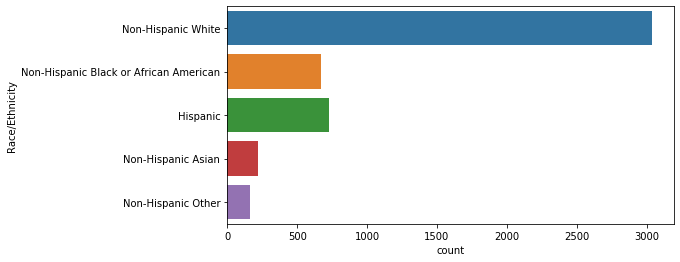

In [81]:
#assign size of plot
plt.subplots(figsize=(8,4))

#create a bar plot of Cancer Category frequency
sns.countplot(y='Race/Ethnicity',
              data=cd_r)

plt.xticks(rotation=0)

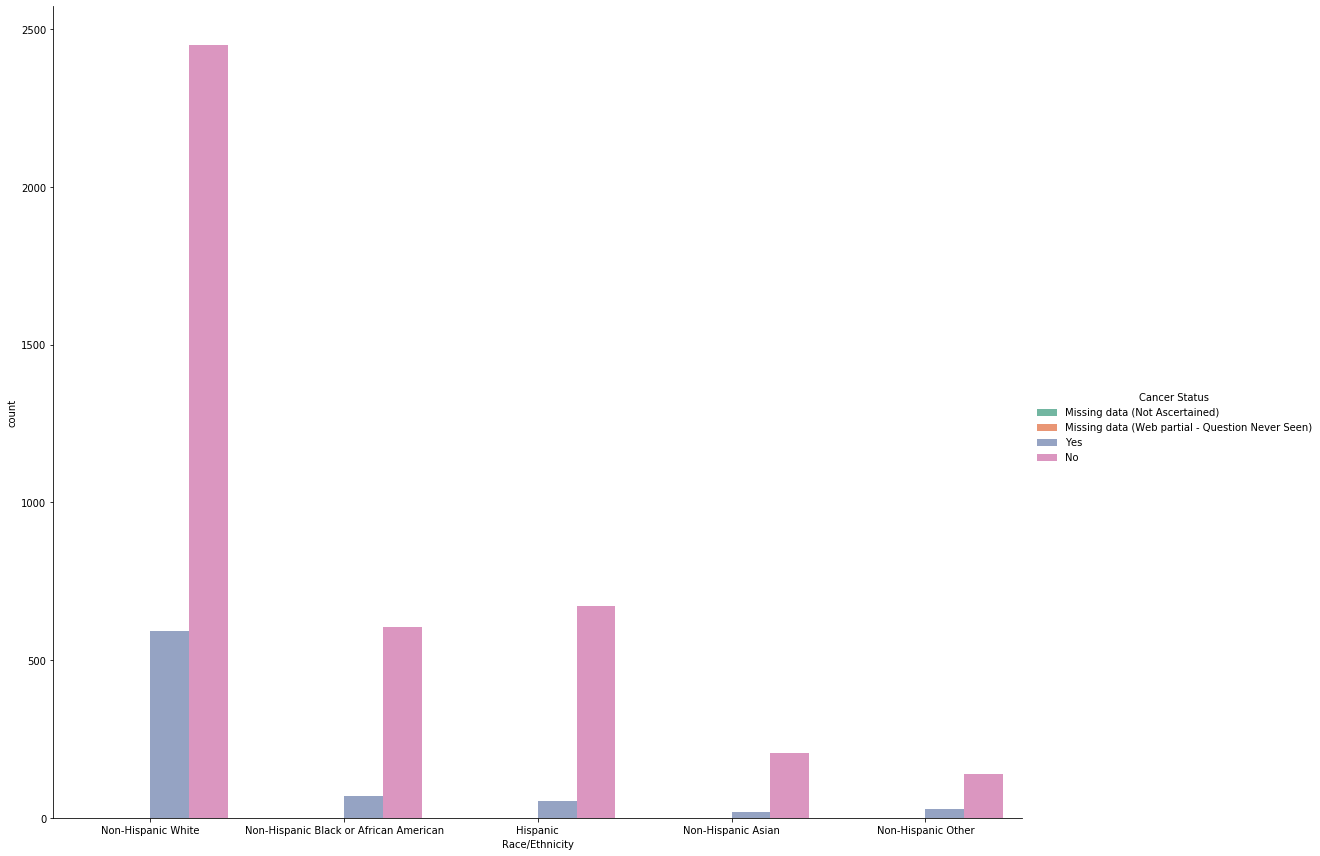

In [82]:
g = sns.catplot(x="Race/Ethnicity",
                hue="Cancer Status",
                data=cd_r,
                kind="count",
                height=12,
                aspect=1.2,
                palette="Set2")

#### [d] Household Income

In [83]:
cd_h = df1b[['Cancer Status','Household Income']]
cd_h.head(2)

,Cancer Status,Household Income
0,No,"Less than $20,000"
1,No,"$50,000 to < $75,000"


In [84]:
#check missing values in Household Income
cd_h['Household Income'].value_counts()

$75,000 or More                                     1799
Less than $20,000                                    894
$50,000 to < $75,000                                 845
$35,000 to < $50,000                                 619
$20,000 to < $35,000                                 612
Missing Data (Not Ascertained)                       548
Missing data (Web partial - Question Never Seen)       9
Name: Household Income, dtype: int64

In [85]:
#replace missing and invalid values with NaN
cd_h['Household Income'].replace({
    'Missing Data (Not Ascertained)': np.nan,
    'Missing data (Web partial - Question Never Seen)': np.nan}, 
    inplace=True)

In [86]:
#confirm the changes made
cd_h['Household Income'].value_counts()

$75,000 or More         1799
Less than $20,000        894
$50,000 to < $75,000     845
$35,000 to < $50,000     619
$20,000 to < $35,000     612
Name: Household Income, dtype: int64

In [87]:
#get the unique values
cd_h['Household Income'].unique()

array(['Less than $20,000', '$50,000 to < $75,000',
       '$20,000 to < $35,000', '$35,000 to < $50,000', nan,
       '$75,000 or More'], dtype=object)

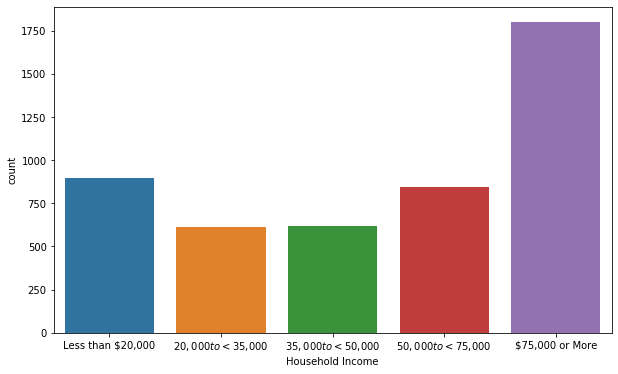

In [88]:
#assign size of plot
plt.subplots(figsize=(10,6))

#create a countplot for Household Income, assign order to bars from low to high
sns.countplot(
    x='Household Income', 
    data=cd_h, 
    order=['Less than $20,000',
    '$20,000 to < $35,000',
    '$35,000 to < $50,000',
    '$50,000 to < $75,000',
    '$75,000 or More'])

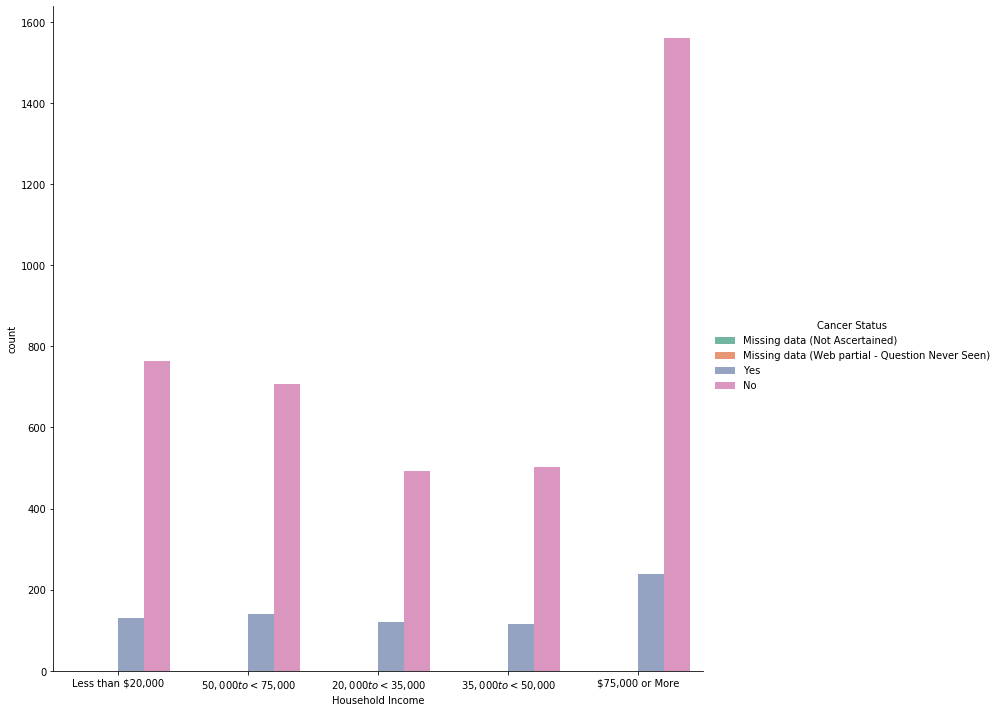

In [89]:
g = sns.catplot(x='Household Income',
                hue="Cancer Status",
                data=cd_h,
                kind="count",
                col_order = [
                    'Less than $20,000',
                    '$20,000 to < $35,000',
                    '$35,000 to < $50,000',
                    '$50,000 to < $75,000',
                    '$75,000 or More'],
                height=10,
                aspect=1,
                palette="Set2")

##### Observation: income level seem to have influence on cancer status, especially comparing the first two categories - the second category (50,000 to <75,000) seem to have more cancer cases than the first category (Less than 20,000).

#### [e] Education

In [90]:
cd_e = df1b[['Cancer Status','Education']]
cd_e.head(2)

,Cancer Status,Education
0,No,Less than High School
1,No,Some College


In [91]:
cd_e['Education'].value_counts()

College Graduate or More                            2408
Some College                                        1588
High School Graduate                                 943
Less than High School                                333
Missing Data (Not Ascertained)                        51
Missing data (Web partial - Question Never Seen)       3
Name: Education, dtype: int64

In [92]:
cd_e['Education'].replace({
    'Missing Data (Not Ascertained)': np.nan,
    'Missing data (Web partial - Question Never Seen)': np.nan}, 
    inplace=True)

In [93]:
cd_e.dropna

<bound method DataFrame.dropna of      Cancer Status                 Education
0               No     Less than High School
1               No              Some College
3               No  College Graduate or More
4               No              Some College
5              Yes      High School Graduate
...            ...                       ...
5433            No      High School Graduate
5434            No              Some College
5435            No  College Graduate or More
5436            No      High School Graduate
5437            No  College Graduate or More

[5326 rows x 2 columns]>

In [94]:
cd_e['Education'].value_counts()

College Graduate or More    2408
Some College                1588
High School Graduate         943
Less than High School        333
Name: Education, dtype: int64

In [95]:
cd_e['Education'].unique()

array(['Less than High School', 'Some College',
       'College Graduate or More', 'High School Graduate', nan],
      dtype=object)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text xticklabel objects>)

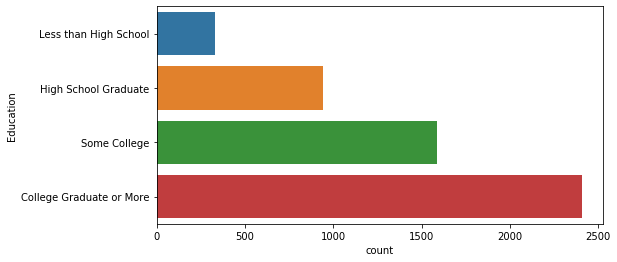

In [96]:
#assign size of plot
plt.subplots(figsize=(8,4))

#create a bar plot of Cancer Category frequency
sns.countplot(y='Education',
              order = ['Less than High School','High School Graduate','Some College','College Graduate or More'],
              data=cd_e)

plt.xticks(rotation=0)

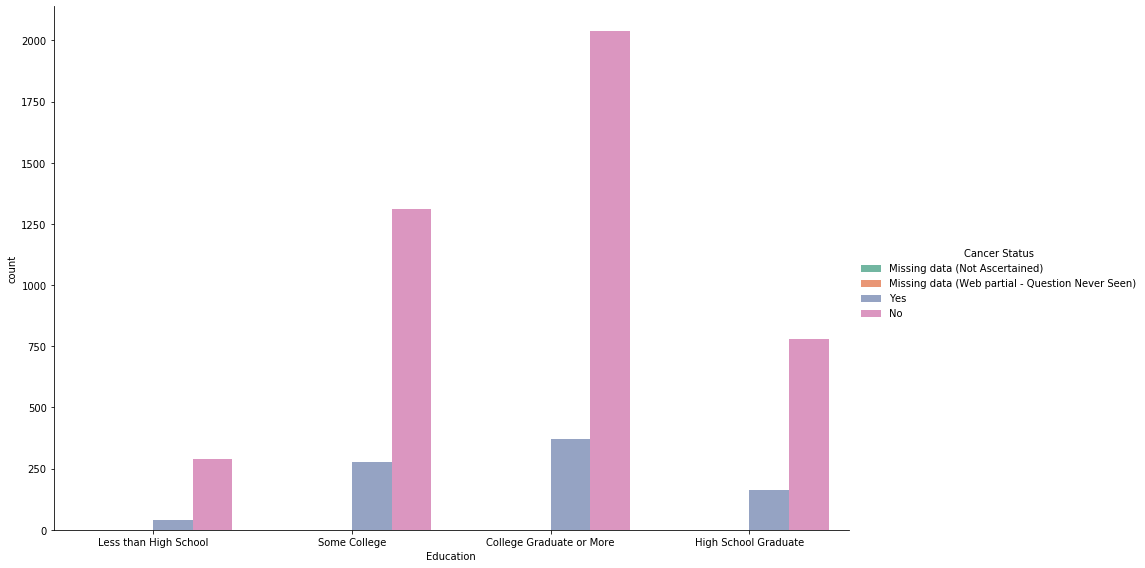

In [97]:
g = sns.catplot(x='Education',
                hue="Cancer Status",
                data=cd_e,
                kind="count",
                col_order = [
                    'Less than High School',
                    'High School Graduate',
                    'Some College',
                    'College Graduate or More'],
                height=8,
                aspect=1.5,
                palette="Set2")

##### Observation: the influence of education level on cancer status is not visible.